In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [5]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
    new = np.random.choice(sample,(n_iterations,sample_size))
    data_mean = np.mean(new)
    mean_array = []
    for i in range(n_iterations):
      mean =  np.mean(new[i, :])
      mean_array.insert(i,mean)
    lower = np.percentile(mean_array, 2.5)
    upper = np.percentile(mean_array, 97.5)
    return data_mean, lower, upper

(0.0, 100000.0)

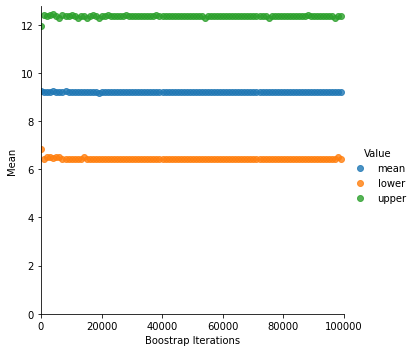

In [10]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	new = np.random.choice(sample,(n_iterations,sample_size))
	data_mean = np.mean(new)
	mean_array = []
	for i in range(n_iterations):
		mean =  np.mean(new[i, :])
		mean_array.insert(i,mean)
	limit = (100-ci)/2
	lower = np.percentile(mean_array, limit)
	upper = np.percentile(mean_array, 100-limit)
	return data_mean, lower, upper

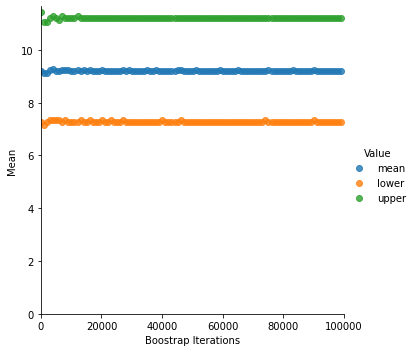

In [15]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [17]:
# Load and visualise the vehicles dataset
df=pd.read_csv("vehicles.csv")
df.head(10)
# Note: you can add more cells as needed to organise your code and your plots


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
5,15,35.0
6,14,24.0
7,14,19.0
8,14,28.0
9,15,23.0


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

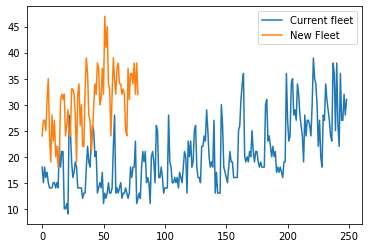

In [37]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f808662b0>,
      dtype=object)

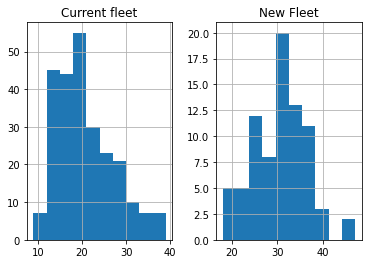

In [38]:
df.hist()

In [0]:
def pval (iter, data1, data2, t_obs):
  cnt = 0
  data = np.concatenate((data1,data2))
  for i in range(0,iter):
    perm = np.random.permutation(data)
    pcurrent = perm[:len(data1)]
    pnew = perm[len(data1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iter
  return p_value